<a href="https://colab.research.google.com/github/Udaykamal2005/OIBSIP/blob/main/Project_3_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q imbalanced-learn

In [ ]:
# Cell 2: Upload CSV using the exact flow you asked for
from google.colab import files
import io, pandas as pd, sys

print("Please upload 'creditcard.csv' (or your CSV).")
uploaded = files.upload()  # interactively upload

uploaded_files = list(uploaded.keys())
print("Uploaded files:", uploaded_files)

# Prefer file name 'creditcard.csv' if present; otherwise use the first file
if 'creditcard.csv' in uploaded_files:
    fname = 'creditcard.csv'
else:
    fname = uploaded_files[0]

# Read CSV into df with fallback encodings
try:
    df = pd.read_csv(io.BytesIO(uploaded[fname]), low_memory=False)
    print(f"Loaded {fname} -> shape {df.shape}")
except Exception as e:
    try:
        df = pd.read_csv(io.BytesIO(uploaded[fname]), encoding='latin1', low_memory=False)
        print(f"Loaded {fname} with latin1 -> shape {df.shape}")
    except Exception as e2:
        raise RuntimeError(f"Failed to read {fname}: {e} ; {e2}")

# Quick preview
pd.set_option('display.max_columns', None)
print("\nColumns:", df.columns.tolist())
display(df.head())


Please upload 'creditcard.csv' (or your CSV).


Saving creditcard.csv to creditcard.csv
Uploaded files: ['creditcard.csv']
Loaded creditcard.csv -> shape (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Cell 3: basic info, dtypes, missing values
print("Shape:", df.shape)
print("\nDtypes:")
print(df.dtypes)
print("\nMissing values per column (top 10):")
print(df.isna().sum().head(10))

print("\nClass distribution (fraud vs non-fraud):")
print(df['Class'].value_counts())
print("\nClass distribution (percent):")
print(df['Class'].value_counts(normalize=True) * 100)



Shape: (284807, 31)

Dtypes:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing values per column (top 10):
Time    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
dtype: int64

Class distribution (fraud vs non-fraud):
Class
0    284315
1       492
Name: count, dtype: int64

Class distribution (percent):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


Amount summary:


,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


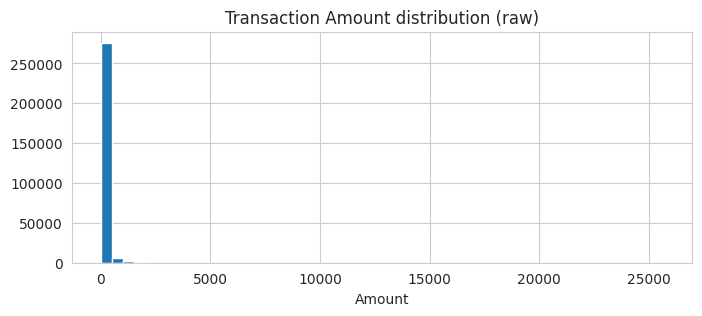

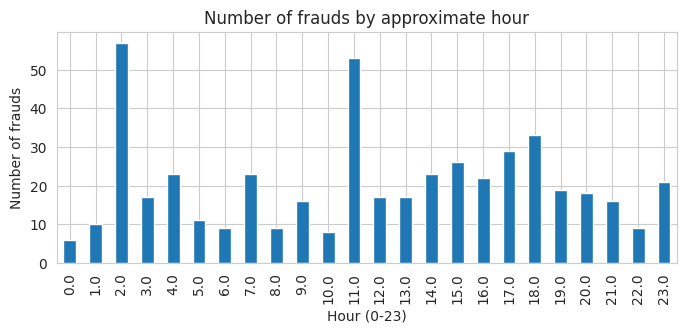

Top 5 transaction amounts for fraud cases:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
176049,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,-1.531608,-1.394328,-0.220719,-1.530990,1.075248,0.388383,-0.660655,0.093321,0.335742,0.057551,3.973217,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1,10.0
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,-1.987773,4.690396,-6.998042,1.454012,-3.738023,0.317742,-2.013543,-5.136135,-1.183822,1.663394,-3.042626,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1,2.0
249167,154278.0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,-4.441484,2.944375,-3.805469,-2.102227,-6.106183,-0.641736,-1.555963,-2.084067,0.394247,0.083380,3.189355,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1504.93,1,18.0
89190,62467.0,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,-3.990551,4.986014,-6.116383,0.042324,-6.043393,1.821401,-4.745462,-10.075646,-3.604596,1.435294,-1.562162,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1,17.0
81609,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,-4.350685,3.064246,-2.718731,0.068788,-5.586873,-0.966076,-2.502049,-4.460495,-0.870526,0.595629,3.209171,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1,16.0


In [ ]:
# Cell 4: EDA plots and stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Amount summary
print("Amount summary:")
display(df['Amount'].describe())

# Histogram of Amount (log scale)
plt.figure(figsize=(8,3))
plt.hist(df['Amount'].replace(0, 1), bins=50)
plt.title('Transaction Amount distribution (raw)')
plt.xlabel('Amount')
plt.show()

# Count of fraud over time (by Time bucket)
df['hour'] = (df['Time'] // 3600) % 24  # approximate hour of dataset
fraud_by_hour = df.groupby('hour')['Class'].sum()
plt.figure(figsize=(8,3))
fraud_by_hour.plot(kind='bar')
plt.title('Number of frauds by approximate hour')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of frauds')
plt.show()

# Print top 5 largest amounts among frauds
print("Top 5 transaction amounts for fraud cases:")
display(df[df['Class']==1].sort_values('Amount', ascending=False).head())


In [ ]:
# Cell 5: prepare X and y. Scale 'Amount' and drop 'Time' (we keep V1..V28 which are PCA features)
from sklearn.preprocessing import StandardScaler
import numpy as np

# target
y = df['Class'].copy()

# features: all columns except 'Class' and 'Time' (Time may be less useful)
X = df.drop(['Class','Time'], axis=1).copy()

# Scale Amount (others V1..V28 are already PCA-scaled)
scaler = StandardScaler()
X['Amount_scaled'] = scaler.fit_transform(X[['Amount']])
X = X.drop(['Amount'], axis=1)

print("X shape:", X.shape, "y shape:", y.shape)
display(X.head())


X shape: (284807, 30) y shape: (284807,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,hour,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.073403


In [ ]:
# Cell 6: train-test split stratified by class
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Train class distribution:", y_train.value_counts().to_dict())
print("Test class distribution:", y_test.value_counts().to_dict())


Train size: (227845, 30) Test size: (56962, 30)
Train class distribution: {0: 227451, 1: 394}
Test class distribution: {0: 56864, 1: 98}


In [ ]:
# Cell 7: train a baseline logistic regression and evaluate (use class_weight='balanced' for a second run)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support

# Baseline with class_weight='balanced' because dataset is heavily imbalanced
clf = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
clf.fit(X_train, y_train)

# Predict & evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("Classification report (baseline logistic):")
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Classification report (baseline logistic):
              precision    recall  f1-score   support

           0     0.9998    0.9737    0.9866     56864
           1     0.0561    0.9082    0.1057        98

    accuracy                         0.9736     56962
   macro avg     0.5280    0.9409    0.5461     56962
weighted avg     0.9982    0.9736    0.9851     56962

ROC AUC: 0.971762020086594


In [ ]:
# Cell 8: SMOTE oversampling (only on training data)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE, class distribution:", dict(pd.Series(y_train_res).value_counts()))

After SMOTE, class distribution: {0: np.int64(227451), 1: np.int64(227451)}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import io

# Prepare X and y (from Cell 5: prepare X and y. Scale 'Amount' and drop 'Time')
# This assumes 'df' is already loaded and available from previous cells.
# target
y = df['Class'].copy()

# features: all columns except 'Class' and 'Time' (Time may be less useful)
X = df.drop(['Class','Time'], axis=1).copy()

# Scale Amount (others V1..V28 are already PCA-scaled)
scaler = StandardScaler()
X['Amount_scaled'] = scaler.fit_transform(X[['Amount']])
X = X.drop(['Amount'], axis=1)

# Re-run train-test split here to ensure X_train, y_train, X_test, y_test are defined.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE oversampling (only on training data)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE, class distribution:", dict(pd.Series(y_train_res).value_counts()))

# Logistic on SMOTE data
clf_sm_lr = LogisticRegression(max_iter=1000, solver='liblinear')
clf_sm_lr.fit(X_train_res, y_train_res)
proba_lr = clf_sm_lr.predict_proba(X_test)[:,1]
pred_lr = clf_sm_lr.predict(X_test)

# Random Forest on SMOTE data
clf_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
clf_rf.fit(X_train_res, y_train_res)
proba_rf = clf_rf.predict_proba(X_test)[:,1]
pred_rf = clf_rf.predict(X_test)

print("Logistic (SMOTE) - ROC AUC:", roc_auc_score(y_test, proba_lr))
print(classification_report(y_test, pred_lr, digits=4))

print("RandomForest (SMOTE) - ROC AUC:", roc_auc_score(y_test, proba_rf))
print(classification_report(y_test, pred_rf, digits=4))

After SMOTE, class distribution: {0: np.int64(227451), 1: np.int64(227451)}


KeyboardInterrupt: 

In [ ]:
# Debug + repair cell for RandomForest proba error
import numpy as np
import pandas as pd
import traceback
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def print_var_info(name, var):
    try:
        if hasattr(var, 'shape'):
            print(f"{name}: type={type(var)}, shape={var.shape}, dtype={getattr(var,'dtype',None)}")
            # show small sample
            if getattr(var, 'shape', ()) and var.shape[0] > 0:
                print(f"  sample index 0 row: {repr(var.iloc[0] if isinstance(var, pd.DataFrame) else (var[0] if hasattr(var, '__getitem__') else 'N/A'))}")
        else:
            print(f"{name}: type={type(var)}, repr={repr(var)[:200]}")
    except Exception as e:
        print(f"Could not inspect {name}: {e}")

# 1) Show which important variables exist and their shapes
vars_to_check = ['X_train_res','y_train_res','X_test','y_test','clf_rf']
for vname in vars_to_check:
    if vname in globals():
        print_var_info(vname, globals()[vname])
    else:
        print(f"{vname} is NOT defined in globals()")

print("\n--- Basic checks ---")
# 2) Basic checks: X_train_res and y_train_res
try:
    # ensure numeric and no NaNs for training/resampled data
    if 'X_train_res' in globals():
        print("X_train_res dtypes (first 10):")
        print(globals()['X_train_res'].dtypes.head(10))
        print("Any NaNs in X_train_res?", globals()['X_train_res'].isna().any().any())
    if 'y_train_res' in globals():
        print("y_train_res value counts (top):")
        print(pd.Series(globals()['y_train_res']).value_counts().head())
except Exception as e:
    print("Error while checking train data:", e)

# 3) Check clf_rf fitted status and estimators_
need_retrain = False
if 'clf_rf' in globals():
    clf_obj = globals()['clf_rf']
    # check for estimators_ attr
    if hasattr(clf_obj, 'estimators_'):
        n_estimators_fitted = len(getattr(clf_obj, 'estimators_', []))
        print(f"\nclf_rf present. estimators_ length = {n_estimators_fitted}")
        if n_estimators_fitted == 0:
            print("-> clf_rf has zero estimators_ (unfitted or fit failed). Will retrain.")
            need_retrain = True
    else:
        print("\nclf_rf present but no attribute 'estimators_'. It might not be a RandomForestClassifier or is unfitted.")
        need_retrain = True
else:
    print("\nclf_rf not found. Will instantiate and train a new RandomForest.")
    need_retrain = True

# 4) If we need to retrain, attempt to retrain with safeguards
if need_retrain:
    try:
        print("\n--- Retraining RandomForestClassifier (quick test) ---")
        # Verify training data present
        if ('X_train_res' not in globals()) or ('y_train_res' not in globals()):
            raise RuntimeError("X_train_res or y_train_res is missing. Cannot train RandomForest.")
        Xtr = globals()['X_train_res']
        ytr = globals()['y_train_res']
        # ensure no NaNs and numeric dtypes
        if Xtr.isna().any().any():
            print("Found NaNs in X_train_res — filling with 0s for training.")
            Xtr = Xtr.fillna(0)
        # convert to numeric if needed
        for c in Xtr.columns:
            if not np.issubdtype(Xtr[c].dtype, np.number):
                Xtr[c] = pd.to_numeric(Xtr[c], errors='coerce').fillna(0)
        # small, fast forest first, then you can increase n_estimators
        clf_rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
        clf_rf.fit(Xtr, ytr)
        print("Retraining finished. estimators_ length:", len(clf_rf.estimators_))
        globals()['clf_rf'] = clf_rf  # overwrite global
    except Exception as e:
        print("Retraining failed with exception:")
        traceback.print_exc()
        raise

# 5) Now compute predictions & probabilities safely
try:
    # Ensure X_test exists and is compatible
    if 'X_test' not in globals() or 'y_test' not in globals():
        raise RuntimeError("X_test and/or y_test are not defined in globals(). Cannot compute metrics.")
    Xte = globals()['X_test']
    yte = globals()['y_test']
    # same cleaning for X_test
    if Xte.isna().any().any():
        print("Found NaNs in X_test — filling with 0s for prediction.")
        Xte = Xte.fillna(0)
    for c in Xte.columns:
        if not np.issubdtype(Xte[c].dtype, np.number):
            Xte[c] = pd.to_numeric(Xte[c], errors='coerce').fillna(0)
    proba_rf = globals()['clf_rf'].predict_proba(Xte)[:,1]
    pred_rf = globals()['clf_rf'].predict(Xte)
    print("\nPredictions generated. Example proba (first 5):", proba_rf[:5].tolist())
    print("ROC AUC on X_test:", roc_auc_score(yte, proba_rf))
    # put back into globals for downstream cells
    globals()['proba_rf'] = proba_rf
    globals()['pred_rf'] = pred_rf
except Exception as e:
    print("Failed to predict proba on X_test. Exception:")
    traceback.print_exc()
    raise

print("\n--- Done. You can now re-run your ROC/PR plotting cell. ---")


X_train_res: type=<class 'pandas.core.frame.DataFrame'>, shape=(454902, 29), dtype=None
  sample index 0 row: V1               1.946747
V2              -0.752526
V3              -1.355130
V4              -0.661630
V5               1.502822
V6               4.024933
V7              -1.479661
V8               1.139880
V9               1.406819
V10             -0.157403
V11             -0.113729
V12              0.510277
V13              0.061258
V14             -0.066555
V15              1.328702
V16              0.352514
V17             -0.765670
V18              0.141938
V19             -0.451365
V20             -0.134435
V21              0.076197
V22              0.297537
V23              0.307915
V24              0.690980
V25             -0.350316
V26             -0.388907
V27              0.077641
V28             -0.032248
Amount_scaled   -0.323963
Name: 0, dtype: float64
y_train_res: type=<class 'pandas.core.series.Series'>, shape=(454902,), dtype=int64
  sample index 0 row: np.int

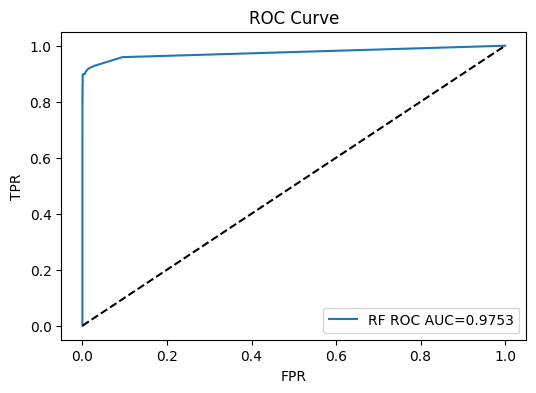

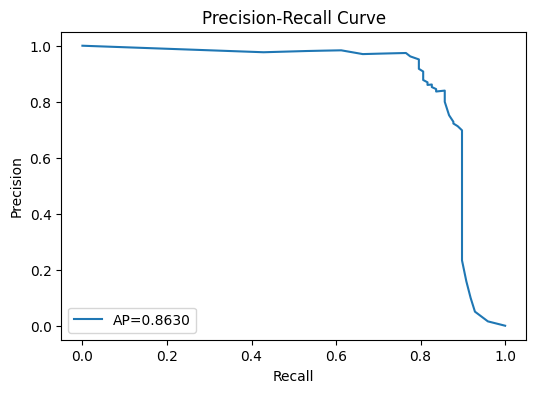

In [ ]:
# Cell 10: plot ROC and Precision-Recall for best model (RandomForest here)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score

fpr, tpr, _ = roc_curve(y_test, proba_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'RF ROC AUC={roc_auc_score(y_test, proba_rf):.4f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, proba_rf)
ap = average_precision_score(y_test, proba_rf)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AP={ap:.4f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve'); plt.legend()
plt.show()


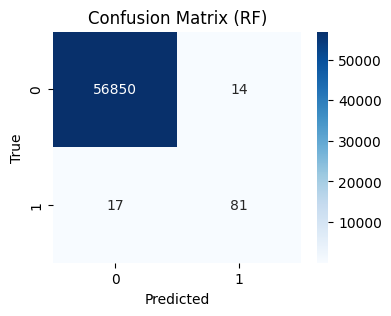

Predicted frauds (RF): 95 Actual frauds: 98


In [ ]:
# Cell 11: confusion matrix for RandomForest predictions
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix (RF)')
plt.show()

# Show counts of predicted frauds
print("Predicted frauds (RF):", sum(pred_rf==1), "Actual frauds:", sum(y_test==1))


In [ ]:
# Cell 13: example inference on new transaction(s)
import numpy as np

# Suppose you have a new sample with columns V1..V28 and Amount
# Replace values below with real numbers or use a sample from X_test
sample = X_test.sample(n=3, random_state=1)  # using real rows as demo
print("Sample rows (features):")
display(sample)

# predict probability fraud
probs = clf_rf.predict_proba(sample)[:,1]
preds = clf_rf.predict(sample)
print("Predicted probabilities:", probs)
print("Predicted labels (1=fraud):", preds)


Sample rows (features):


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled
100737,-0.582809,-0.186214,2.668955,-0.812159,-1.586665,0.490834,-1.051076,0.414547,0.443001,0.220555,-0.832646,-0.386741,-0.486084,-1.495134,-1.294427,0.064446,1.308089,-1.736980,0.624266,0.121284,0.241500,1.051246,-0.162441,0.462818,-0.050183,-0.083646,0.100930,0.087351,-0.341235
12147,-0.007403,0.258208,1.878922,-0.471597,-0.886574,-0.582105,-0.402487,-0.926714,1.977015,-1.280846,0.466784,-1.836768,1.798531,1.034612,-1.246812,0.177465,0.535057,-0.270007,-1.068338,-0.273728,0.687315,-0.128478,-0.209639,0.754155,0.782618,1.031000,0.040751,0.191883,-0.232087
218237,-1.036876,1.549195,0.153311,-0.936236,1.230715,0.181149,0.466963,-1.587515,-0.670755,-0.911953,0.875216,0.864975,0.688619,-0.954360,-0.862616,0.578670,0.155493,0.327002,0.325664,-0.316389,1.192072,-1.557625,-0.107941,0.179662,0.700380,0.296183,-0.190557,-0.034479,-0.349671


Predicted probabilities: [0. 0. 0.]
Predicted labels (1=fraud): [0 0 0]
